In [21]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import datetime
import seaborn as sns
sns.set(rc={'figure.figsize':(13, 6)})

In [2]:
mypath = "../data/revisions/"
file = "rev_kash_en_21-10-2019 12-30-34.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        df = pd.DataFrame(data)

In [12]:
type(data)

list

In [3]:
df['timestamp'] = df['timestamp'].astype(str)
df.timestamp=df.timestamp.str.replace("T"," ")
df.timestamp=df.timestamp.str.replace("Z","")
# df.to_csv(r'kash_hi.csv')
print(df[:3])

                 user            timestamp    size  \
0             MarkH21  2019-10-20 22:45:36  365153   
1         Noamaster88  2019-10-20 17:51:10  365156   
2  InternetArchiveBot  2019-10-14 19:14:01  365153   

                                               slots  \
0  {'main': {'contentmodel': 'wikitext', 'content...   
1  {'main': {'contentmodel': 'wikitext', 'content...   
2  {'main': {'contentmodel': 'wikitext', 'content...   

                                             comment  
0  Undid revision 922208355 by [[Special:Contribu...  
1                                                     
2  Bluelinking 1 books for [[WP:V|verifiability]]...  


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['size'] = pd.to_numeric(df['size'])
df.dtypes
df = df.set_index('timestamp')

In [5]:
# df = df.set_index('timestamp')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name
df.dtypes
df.head(3)

,user,size,slots,comment,year,month,day
timestamp,,,,,,,
2019-10-20 22:45:36,MarkH21,365153,"{'main': {'contentmodel': 'wikitext', 'content...",Undid revision 922208355 by [[Special:Contribu...,2019,10,Sunday
2019-10-20 17:51:10,Noamaster88,365156,"{'main': {'contentmodel': 'wikitext', 'content...",,2019,10,Sunday
2019-10-14 19:14:01,InternetArchiveBot,365153,"{'main': {'contentmodel': 'wikitext', 'content...",Bluelinking 1 books for [[WP:V|verifiability]]...,2019,10,Monday


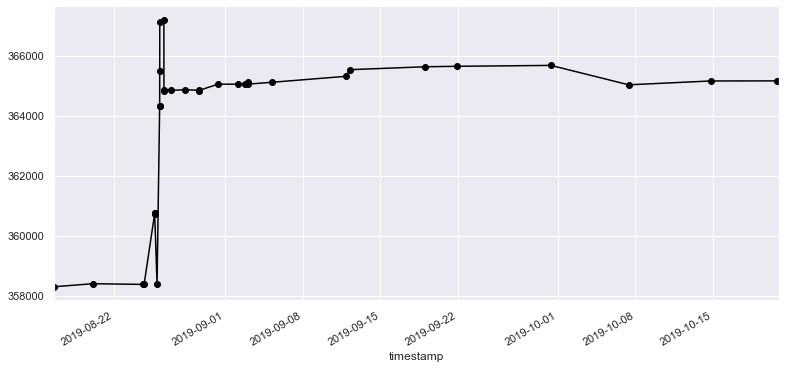

In [22]:
df['size'].plot(marker='o', linestyle='-', linewidth=1.5, color = 'black')

In [18]:
df = df.drop(['user', 'slots','comment'], axis=1)
df.dtypes
df.to_csv(r'kash_en.csv')